In [96]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.spatial import distance
from tesser import fit
from tesser import cython_fit
from tesser import network
from tesser import util
from tesser import tasks
from tesser import sr

In [2]:
# data_dir = "/home/rodrigo/Dropbox/tesser_successor/Data/"
data_dir= "/mnt/e/Data"

In [3]:
induct_all = util.load_induct(data_dir)
struct_all = util.load_struct(data_dir)

subj_filter = f'SubjNum == {101}'
induct_df = induct_all.query(subj_filter)
struct_df = struct_all.query(subj_filter)

n_states = len(np.unique(struct_df.objnum))

# get community matrix
net = network.temp_node_info()
comm = 1 - distance.squareform(distance.pdist(net['comm'][:, None], 'hamming'))

Softmax model w = 1

In [5]:
fixed = {'w': 1.0}
var_names = ['alpha', 'gamma', 'tau']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}
w_1_comm_results = cython_fit.fit_induct(struct_all, induct_all, fixed, var_names, var_bounds,
                               n_states=n_states, verbose=False, model_type='comm', model=comm)
w_1_comm_results

({'w': 1.0,
  'alpha': 0.04573256422681954,
  'gamma': 0.9915167017544981,
  'tau': 1.0663896956712504},
 -1053.5980656050149)

Softmax model w=0

In [7]:
fixed = {'w': 0.0}
var_names = ['alpha', 'gamma', 'tau']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}
w_0_comm_results= cython_fit.fit_induct(struct_all, induct_all, fixed, var_names, var_bounds,
                               n_states=n_states, verbose=False, model_type='comm', model=comm)
w_0_comm_results

({'w': 0.0,
  'alpha': 0.16401955588826095,
  'gamma': 0.6685768585411865,
  'tau': 2.6667516641558304},
 -1050.3085524535381)

Softmax model w = 'free'

In [6]:
fixed = {}
var_names = ['alpha', 'gamma', 'tau', 'w']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10], 'w': [0, 1.0]}
w_free_comm_results= cython_fit.fit_induct(struct_all, induct_all, fixed, var_names, var_bounds,
                               n_states=n_states, verbose=False, model_type='comm', model=comm)
w_free_comm_results

({'alpha': 0.45764430652406546,
  'gamma': 0.0,
  'tau': 1.6172174372823305,
  'w': 0.4195409847445452},
 -1049.7885014352262)

# High & low performers community matrix
* ignore gamma2 as it is not used

High performers

In [8]:
high =tasks.induct_avg_split_high(tasks.induct_avg_all(data_dir))
hp = high.participant

struct_high_all = struct_all.copy()
s_all = struct_high_all[struct_high_all['SubjNum'].isin(list(hp))]

induct_high_all = induct_all.copy()
i_all = induct_high_all[induct_high_all['SubjNum'].isin(list(hp))]

In [9]:
# High performers

fixed = {'w': 1.0}
var_names = ['alpha', 'gamma', 'tau']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}
cython_fit.fit_induct(s_all, i_all, fixed, var_names, var_bounds,
                               n_states=n_states, verbose=False, model_type='comm', model=comm)

({'w': 1.0,
  'alpha': 0.054503083621001376,
  'gamma': 0.854950726114058,
  'tau': 0.3567898623904296},
 -442.87261457114255)

In [10]:
fixed = {}
var_names = ['alpha', 'gamma', 'tau', 'w']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10], 'w': [0, 1.0]}
cython_fit.fit_induct(s_all, i_all, fixed, var_names, var_bounds,
                               n_states=n_states, verbose=False, model_type='comm', model=comm)

({'alpha': 0.3295498855111994,
  'gamma': 0.9856740352565068,
  'tau': 1.00202434216163,
  'w': 0.12294146715207907},
 -428.67429182219155)

Low performers

In [11]:
# low performers
low =tasks.induct_avg_split_low(tasks.induct_avg_all(data_dir))
lp = low.participant

struct_low_all = struct_all.copy()
s_all_low = struct_low_all[struct_low_all['SubjNum'].isin(list(lp))]

induct_low_all = induct_all.copy()
i_all_low = induct_low_all[induct_low_all['SubjNum'].isin(list(lp))]

In [12]:
fixed = {'w': 1.0}
var_names = ['alpha', 'gamma', 'tau']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}
cython_fit.fit_induct(s_all_low, i_all_low, fixed, var_names, var_bounds,
                               n_states=n_states, verbose=False, model_type='comm', model=comm)

({'w': 1.0,
  'alpha': 0.6680899483885333,
  'gamma': 0.0,
  'tau': 1.9512501941169609},
 -638.4157201529925)

In [13]:
fixed = {}
var_names = ['alpha', 'gamma', 'tau', 'w']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10], 'w': [0, 1.0]}
cython_fit.fit_induct(s_all_low, i_all_low, fixed, var_names, var_bounds,
                               n_states=n_states, verbose=False, model_type='comm', model=comm)

({'alpha': 0.6680903734582023,
  'gamma': 0.0,
  'tau': 1.9512528077810498,
  'w': 1.0},
 -638.4157201529679)

# Individual Results for w = 1 and community matrix model

In [14]:
fixed = {'w': 1.0}
var_names = ['alpha', 'gamma', 'tau']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}
results = cython_fit.fit_induct_indiv(struct_all, induct_all, fixed, var_names, var_bounds,
                               n_states=n_states, verbose=False, model_type='comm', model=comm)

Estimating parameters for 100...
Estimating parameters for 101...
Estimating parameters for 102...
Estimating parameters for 103...
Estimating parameters for 104...
Estimating parameters for 105...
Estimating parameters for 106...
Estimating parameters for 108...
Estimating parameters for 109...
Estimating parameters for 110...
Estimating parameters for 111...
Estimating parameters for 112...
Estimating parameters for 113...
Estimating parameters for 114...
Estimating parameters for 115...
Estimating parameters for 116...
Estimating parameters for 117...
Estimating parameters for 119...
Estimating parameters for 120...
Estimating parameters for 121...
Estimating parameters for 122...
Estimating parameters for 123...
Estimating parameters for 124...
Estimating parameters for 125...
Estimating parameters for 126...
Estimating parameters for 127...
Estimating parameters for 128...
Estimating parameters for 129...
Estimating parameters for 130...
Estimating parameters for 131...
Estimating

In [15]:
results = results.set_index('subject')

In [16]:
res_list = []
for subject in results.index.unique():
    subj_filter = f'SubjNum == {subject}'
    subj_struct = struct_all.query(subj_filter)
    subj_induct = induct_all.query(subj_filter)
    subj_param = results.loc[subject]
    param = {'alpha': subj_param['alpha'], 'gamma': subj_param['gamma'],
             'tau': subj_param['tau'],'w': subj_param['w']}
    res = cython_fit.assess_induct_fit_subject_hybrid(subj_struct, subj_induct, param, n_states, comm)
    res_list.append(res)
fitted = pd.concat(res_list, axis=0)

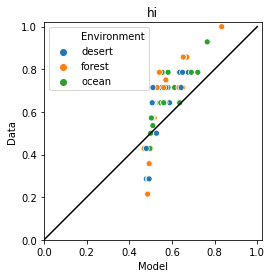

In [27]:
m = fitted.groupby(['Source', 'SubjNum', 'Environment'])['Accuracy'].mean().unstack(level=0)
g = sns.scatterplot(x='Model', y='Data', hue='Environment', data=m.reset_index());
g.set_xlim(0, 1.02);
g.set_ylim(0, 1.02);
g.set_aspect(1);
g.plot((0, 1), (0, 1), '-k');
g.set_title('hi')
fig = g.get_figure()
fig.savefig('./Data/environment_plot_w_1.png')

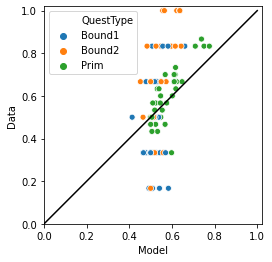

In [18]:
m = fitted.groupby(['Source', 'SubjNum', 'QuestType'])['Accuracy'].mean().unstack(level=0)
g = sns.scatterplot(x='Model', y='Data', hue='QuestType', data=m.reset_index());
g.set_xlim(0, 1.02);
g.set_ylim(0, 1.02);
g.set_aspect(1);
g.plot((0, 1), (0, 1), '-k');
fig = g.get_figure()
fig.savefig('./Data/question_plot_w_1.png')

# Individual Results for w = 0

In [19]:
fixed = {'w': 0.0}
var_names = ['alpha', 'gamma', 'tau']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}
results2 = cython_fit.fit_induct_indiv(struct_all, induct_all, fixed, var_names, var_bounds,
                               n_states=n_states, verbose=False, model_type='comm', model=comm)

Estimating parameters for 100...
Estimating parameters for 101...
Estimating parameters for 102...
Estimating parameters for 103...
Estimating parameters for 104...
Estimating parameters for 105...
Estimating parameters for 106...
Estimating parameters for 108...
Estimating parameters for 109...
Estimating parameters for 110...
Estimating parameters for 111...
Estimating parameters for 112...
Estimating parameters for 113...
Estimating parameters for 114...
Estimating parameters for 115...
Estimating parameters for 116...
Estimating parameters for 117...
Estimating parameters for 119...
Estimating parameters for 120...
Estimating parameters for 121...
Estimating parameters for 122...
Estimating parameters for 123...
Estimating parameters for 124...
Estimating parameters for 125...
Estimating parameters for 126...
Estimating parameters for 127...
Estimating parameters for 128...
Estimating parameters for 129...
Estimating parameters for 130...
Estimating parameters for 131...
Estimating

In [20]:
results2 = results2.set_index('subject')

In [21]:
res_list = []
for subject in results2.index.unique():
    subj_filter = f'SubjNum == {subject}'
    subj_struct = struct_all.query(subj_filter)
    subj_induct = induct_all.query(subj_filter)
    subj_param = results2.loc[subject]
    param = {'alpha': subj_param['alpha'], 'gamma': subj_param['gamma'],
             'tau': subj_param['tau'],'w': subj_param['w']}
    res = cython_fit.assess_induct_fit_subject_hybrid(subj_struct, subj_induct, param, n_states, comm)
    res_list.append(res)
fitted = pd.concat(res_list, axis=0)

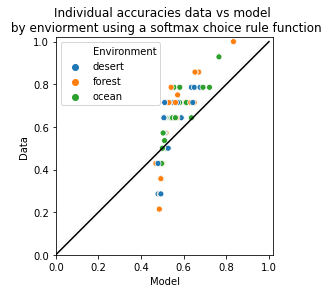

In [22]:
m = fitted.groupby(['Source', 'SubjNum', 'Environment'])['Accuracy'].mean().unstack(level=0)
g = sns.scatterplot(x='Model', y='Data', hue='Environment', data=m.reset_index());
g.set_xlim(0, 1.02);
g.set_ylim(0, 1.02);
g.set_aspect(1);
g.set_title('Individual accuracies data vs model \n by enviorment using a softmax choice rule function')
g.plot((0, 1), (0, 1), '-k');
fig = g.get_figure()
fig.savefig('./Data/enviorment_plot_w0.png')

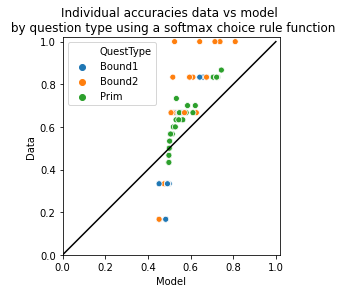

In [23]:
m = fitted.groupby(['Source', 'SubjNum', 'QuestType'])['Accuracy'].mean().unstack(level=0)
g = sns.scatterplot(x='Model', y='Data', hue='QuestType', data=m.reset_index());
g.set_xlim(0, 1.02);
g.set_ylim(0, 1.02);
g.set_aspect(1);
g.set_title('Individual accuracies data vs model \n by question type using a softmax choice rule function')
g.plot((0, 1), (0, 1), '-k');
fig = g.get_figure()
fig.savefig('./Data/question_plot_w0.png')

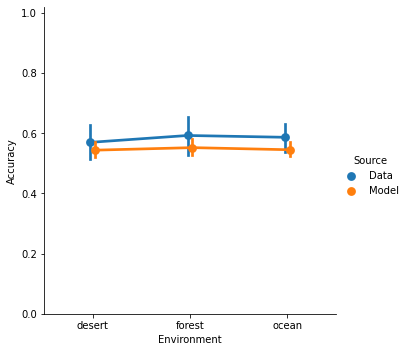

In [24]:
m = fitted.groupby(['Source', 'SubjNum', 'Environment'])['Accuracy'].mean()
g = sns.catplot(kind='point', x='Environment', y='Accuracy', 
                hue='Source', dodge=True, data=m.reset_index())
g.set(ylim=(0, 1.02));


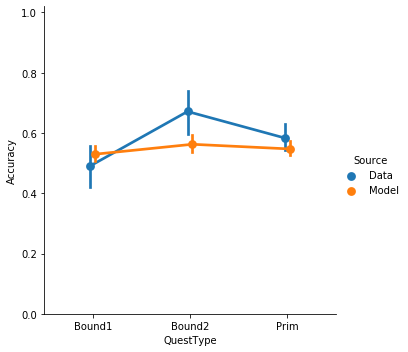

In [24]:
m = fitted.groupby(['Source', 'SubjNum', 'QuestType'])['Accuracy'].mean()
g = sns.catplot(kind='point', x='QuestType', y='Accuracy', 
                hue='Source', dodge=True, data=m.reset_index())
g.set(ylim=(0, 1.02));


# Individual Results for w free

In [25]:
fixed = {}
var_names = ['gamma', 'alpha', 'tau', 'w']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10], 'w': [0, 1]}
results3 = cython_fit.fit_induct_indiv(struct_all, induct_all, fixed, var_names, var_bounds,
                               n_states=n_states, verbose=False, model_type='comm', model=comm)

Estimating parameters for 100...
Estimating parameters for 101...
Estimating parameters for 102...
Estimating parameters for 103...
Estimating parameters for 104...
Estimating parameters for 105...
Estimating parameters for 106...
Estimating parameters for 108...
Estimating parameters for 109...
Estimating parameters for 110...
Estimating parameters for 111...
Estimating parameters for 112...
Estimating parameters for 113...
Estimating parameters for 114...
Estimating parameters for 115...
Estimating parameters for 116...
Estimating parameters for 117...
Estimating parameters for 119...
Estimating parameters for 120...
Estimating parameters for 121...
Estimating parameters for 122...
Estimating parameters for 123...
Estimating parameters for 124...
Estimating parameters for 125...
Estimating parameters for 126...
Estimating parameters for 127...
Estimating parameters for 128...
Estimating parameters for 129...
Estimating parameters for 130...
Estimating parameters for 131...
Estimating

In [26]:
results3 = results3.set_index('subject')

In [27]:
res_list = []
for subject in results3.index.unique():
    subj_filter = f'SubjNum == {subject}'
    subj_struct = struct_all.query(subj_filter)
    subj_induct = induct_all.query(subj_filter)
    subj_param = results2.loc[subject]
    param = {'alpha': subj_param['alpha'], 'gamma': subj_param['gamma'],
             'tau': subj_param['tau'],'w': subj_param['w']}
    res = cython_fit.assess_induct_fit_subject_hybrid(subj_struct, subj_induct, param, n_states, comm)
    res_list.append(res)
fitted = pd.concat(res_list, axis=0)

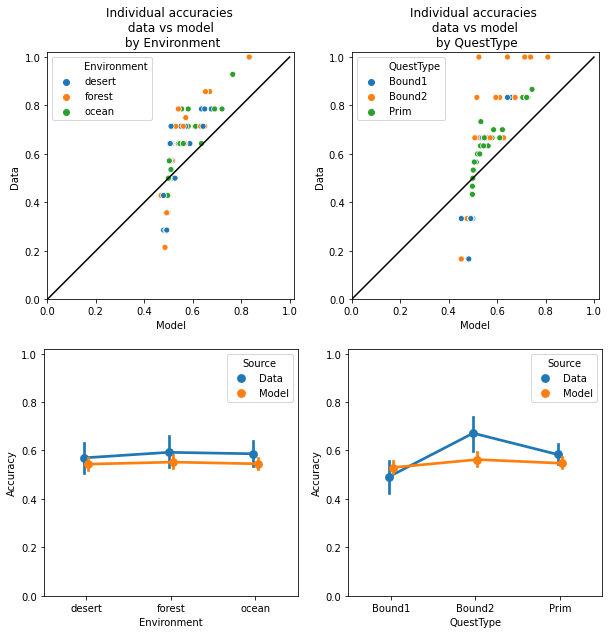

In [94]:
fig, axes = plt.subplots(2, 2, figsize = (10,10),sharey=False)
names = [ 'Environment', 'QuestType']
for i,t in enumerate(names):
    n = fitted.groupby(['Source', 'SubjNum', names[i]])['Accuracy'].mean()
    m  = n.unstack(level=0)
    g = sns.scatterplot(x='Model', y='Data', hue=names[i], data=m.reset_index(), ax=axes[0][i % 2]);
    g.set_xlim(0, 1.02);
    g.set_ylim(0, 1.02);
    g.set_aspect(1);
    g.set_title('Individual accuracies \n data vs model \n by '+names[i])
    g.plot((0, 1), (0, 1), '-k');
    
    f = sns.pointplot(kind='point', x=names[i], y='Accuracy', 
                hue='Source', dodge=True, data=n.reset_index(), ax=axes[1][i % 2]);
    f.set(ylim=(0, 1.02));

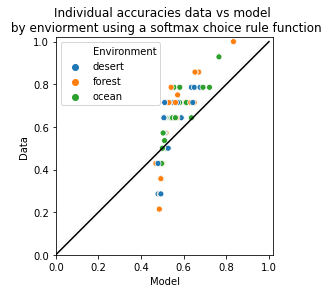

In [55]:
m = fitted.groupby(['Source', 'SubjNum', 'Environment'])['Accuracy'].mean().unstack(level=0)
g = sns.scatterplot(x='Model', y='Data', hue='Environment', data=m.reset_index());
g.set_xlim(0, 1.02);
g.set_ylim(0, 1.02);
g.set_aspect(1);
g.set_title('Individual accuracies data vs model \n by enviorment using a softmax choice rule function')
g.plot((0, 1), (0, 1), '-k');
fig = g.get_figure()
fig.savefig('Data/enviorment_plot_w_free.png')

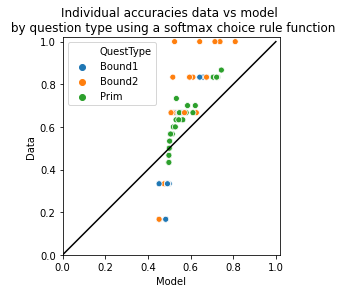

In [31]:
m = fitted.groupby(['Source', 'SubjNum', 'QuestType'])['Accuracy'].mean().unstack(level=0)
g = sns.scatterplot(x='Model', y='Data', hue='QuestType', data=m.reset_index());
g.set_xlim(0, 1.02);
g.set_ylim(0, 1.02);
g.set_aspect(1);
g.set_title('Individual accuracies data vs model \n by question type using a softmax choice rule function')
g.plot((0, 1), (0, 1), '-k');
fig = g.get_figure()
fig.savefig('./Data/question_plot_w_free.png')

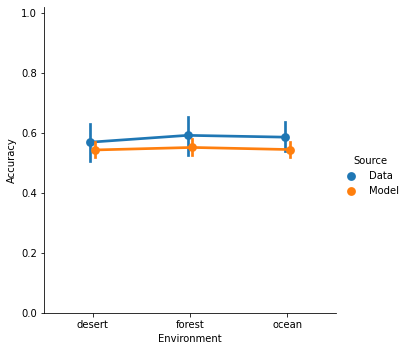

In [82]:
m = fitted.groupby(['Source', 'SubjNum', 'Environment'])['Accuracy'].mean()
g = sns.catplot(kind='point', x='Environment', y='Accuracy', 
                hue='Source', dodge=True, data=m.reset_index())
g.set(ylim=(0, 1.02));


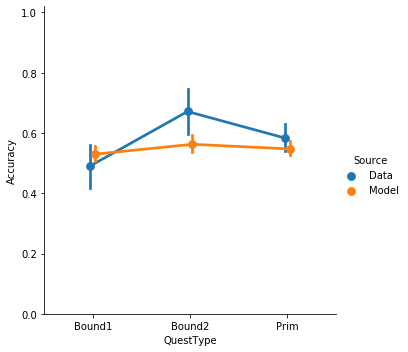

In [31]:
m = fitted.groupby(['Source', 'SubjNum', 'QuestType'])['Accuracy'].mean()
g = sns.catplot(kind='point', x='QuestType', y='Accuracy', 
                hue='Source', dodge=True, data=m.reset_index())
g.set(ylim=(0, 1.02));


Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ca3adac50>,
      dtype=object)

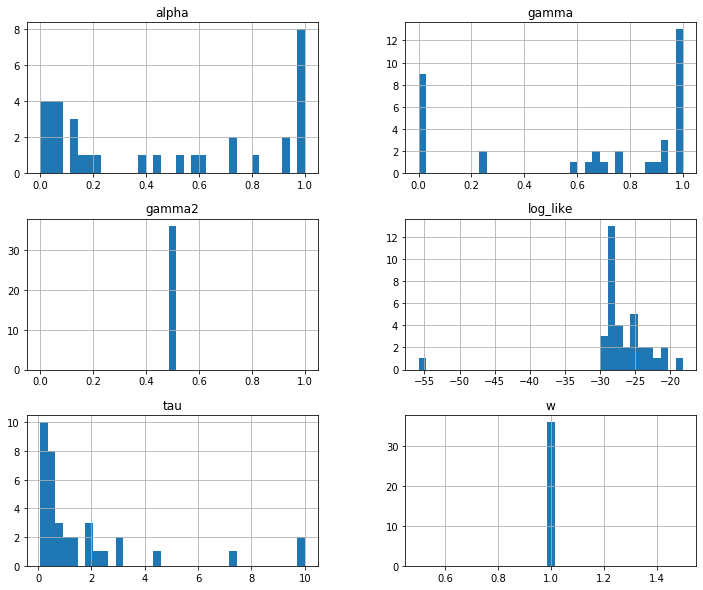

In [32]:
results.hist(bins=35,figsize= (12,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ca34f7a50>,
      dtype=object)

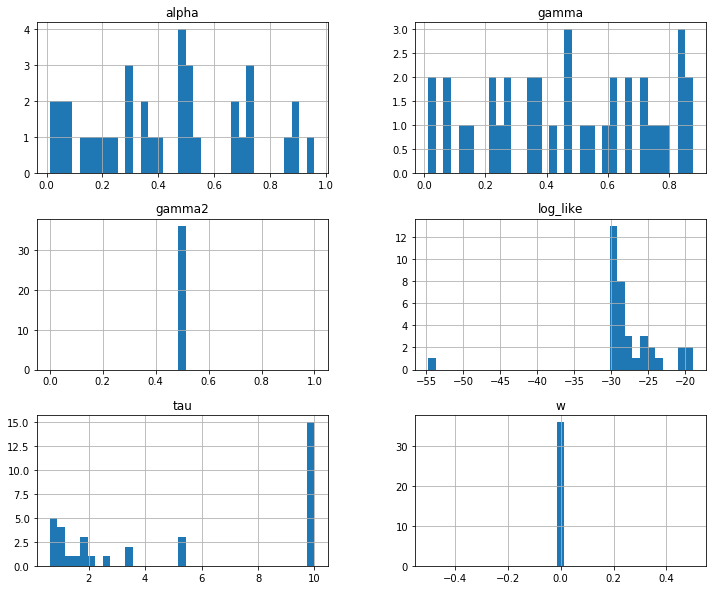

In [33]:
results2.hist(bins=35, figsize= (12,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ca3226e50>,
      dtype=object)

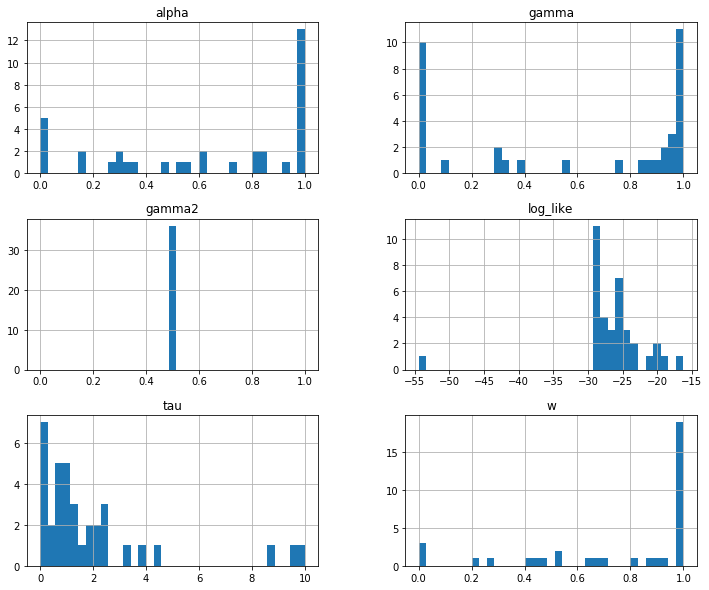

In [34]:
results3.hist(bins=35,figsize= (12,10))

In [35]:
results.to_csv('/home/rodrigo/Documents/preston_labs/tesser_successor/Data/indiv_params_softmax_w1.csv',index=False)

In [36]:
results2.to_csv('/home/rodrigo/Documents/preston_labs/tesser_successor/Data/indiv_params_softmax_w0.csv',index=False)

In [37]:
results3.to_csv('/home/rodrigo/Documents/preston_labs/tesser_successor/Data/indiv_params_softmax_wfree.csv',index=False)

# Multiple gamma models

In [38]:
fixed = {}
var_names = ['gamma', 'gamma2', 'alpha', 'tau', 'w']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'gamma2': [0, 1], 'tau': [0, 10], 'w' : [0, 1]}
gamma_free_results = cython_fit.fit_induct_indiv(struct_all, induct_all, fixed, var_names, var_bounds,
                               n_states=n_states, verbose=False, model_type='gamma', model=comm)

Estimating parameters for 100...
Estimating parameters for 101...
Estimating parameters for 102...
Estimating parameters for 103...
Estimating parameters for 104...
Estimating parameters for 105...
Estimating parameters for 106...
Estimating parameters for 108...
Estimating parameters for 109...
Estimating parameters for 110...
Estimating parameters for 111...
Estimating parameters for 112...
Estimating parameters for 113...
Estimating parameters for 114...
Estimating parameters for 115...
Estimating parameters for 116...
Estimating parameters for 117...
Estimating parameters for 119...
Estimating parameters for 120...
Estimating parameters for 121...
Estimating parameters for 122...
Estimating parameters for 123...
Estimating parameters for 124...
Estimating parameters for 125...
Estimating parameters for 126...
Estimating parameters for 127...
Estimating parameters for 128...
Estimating parameters for 129...
Estimating parameters for 130...
Estimating parameters for 131...
Estimating

In [39]:
gamma_free_results=gamma_free_results.set_index('subject')

In [ ]:
cython_fit.plot_by_questin(gamma_free_results, 'multiple_gamma_fitting_free', 'gamma')

In [45]:
fixed = {'gamma2': 0.5}
var_names = ['gamma', 'alpha', 'tau', 'w']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10], 'w' : [0, 1]}
gamma_fixed_results = cython_fit.fit_induct_indiv(struct_all, induct_all, fixed, var_names, var_bounds,
                               n_states=n_states, verbose=False, model_type='gamma', model=comm)

Estimating parameters for 100...
Estimating parameters for 101...
Estimating parameters for 102...
Estimating parameters for 103...
Estimating parameters for 104...
Estimating parameters for 105...
Estimating parameters for 106...
Estimating parameters for 108...
Estimating parameters for 109...
Estimating parameters for 110...
Estimating parameters for 111...
Estimating parameters for 112...
Estimating parameters for 113...
Estimating parameters for 114...
Estimating parameters for 115...
Estimating parameters for 116...
Estimating parameters for 117...
Estimating parameters for 119...
Estimating parameters for 120...
Estimating parameters for 121...
Estimating parameters for 122...
Estimating parameters for 123...
Estimating parameters for 124...
Estimating parameters for 125...
Estimating parameters for 126...
Estimating parameters for 127...
Estimating parameters for 128...
Estimating parameters for 129...
Estimating parameters for 130...
Estimating parameters for 131...
Estimating

In [46]:
gamma_fixed_results=gamma_fixed_results.set_index('subject')

In [ ]:
cython_fit.plot_by_questin(gamma_fixed_results, 'multiple_gamma_fitting_fixed', 'gamma')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ca2832d90>,
      dtype=object)

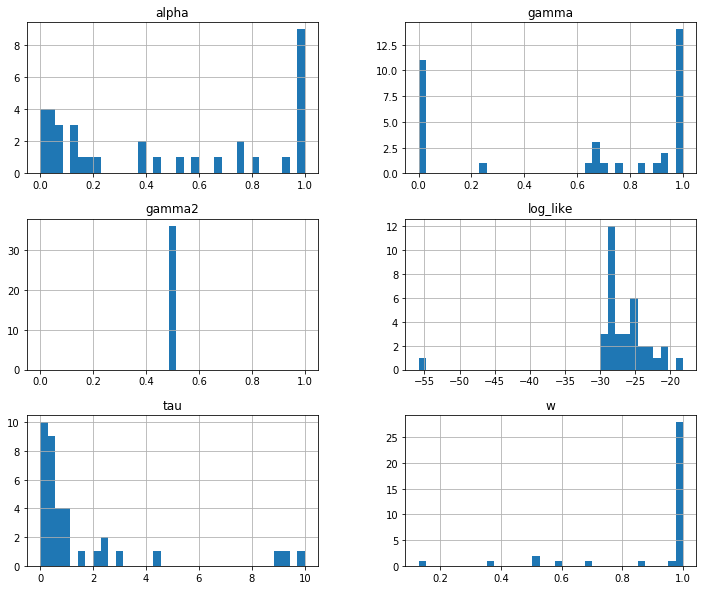

In [47]:
gamma_fixed_results.hist(bins=35,figsize= (12,10))

In [48]:
gamma_free_results.to_csv('./Data/indiv_params_multiple_gamma_free.csv',index=False)
gamma_fixed_results.to_csv('./Data/indiv_params_multiple_gamma_fixed.csv',index=False)
